<a href="https://colab.research.google.com/github/TirumalareddySai/Music_Recommendation_System/blob/main/Music_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE

import warnings
warnings.filterwarnings('ignore')


In [ ]:
tracks = pd.read_csv('/content/data.csv')
tracks.head()


,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,...,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,genres,artists.1
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,...,0.665,-20.096,1.0,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4.0,1921,0.0366,80.954,['show tunes'],"""Cats"" 1981 Original London Cast"
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,...,0.160,-12.441,1.0,Clancy Lowered the Boom,5.0,1921,0.4150,60.936,[],"""Cats"" 1983 Broadway Cast"
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,...,0.101,-14.850,1.0,Gati Bali,5.0,1921,0.0339,110.339,[],"""Fiddler On The Roof” Motion Picture Chorus"
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,...,0.381,-9.316,1.0,Danny Boy,3.0,1921,0.0354,100.109,[],"""Fiddler On The Roof” Motion Picture Orchestra"
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,...,0.229,-10.096,1.0,When Irish Eyes Are Smiling,2.0,1921,0.0380,101.665,[],"""Joseph And The Amazing Technicolor Dreamcoat""..."


In [ ]:
tracks.shape


(29401, 21)

In [ ]:
tracks.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29401 entries, 0 to 29400
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   valence           29401 non-null  float64
 1   year              29401 non-null  int64  
 2   acousticness      29401 non-null  float64
 3   artists           29401 non-null  object 
 4   danceability      29401 non-null  float64
 5   duration_ms       29401 non-null  int64  
 6   energy            29401 non-null  float64
 7   explicit          29401 non-null  int64  
 8   id                29401 non-null  object 
 9   instrumentalness  29400 non-null  float64
 10  key               29400 non-null  float64
 11  liveness          29400 non-null  float64
 12  loudness          29400 non-null  float64
 13  mode              29400 non-null  float64
 14  name              29400 non-null  object 
 15  popularity        29400 non-null  float64
 16  release_date      29400 non-null  object

In [ ]:
tracks.isnull().sum()


valence               0
year                  0
acousticness          0
artists               0
danceability          0
duration_ms           0
energy                0
explicit              0
id                    0
instrumentalness      1
key                   1
liveness              1
loudness              1
mode                  1
name                  1
popularity            1
release_date          1
speechiness           1
tempo                 1
genres              721
artists.1           721
dtype: int64

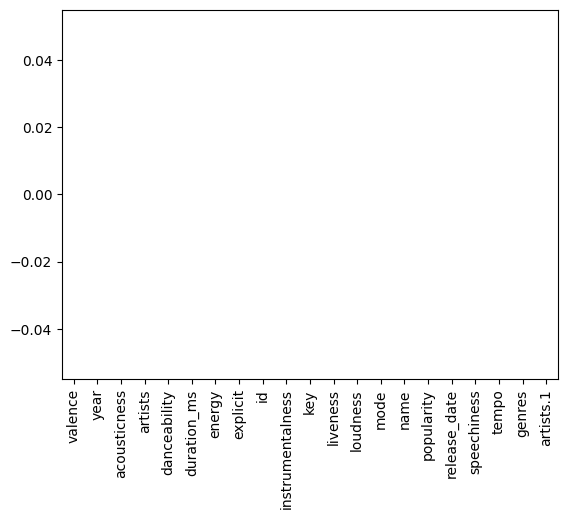

In [ ]:
tracks.dropna(inplace = True)
tracks.isnull().sum().plot.bar()
plt.show()


In [ ]:
tracks['name'].nunique(), tracks.shape


(24876, (28680, 21))

In [ ]:
tracks = tracks.sort_values(by=['popularity'], ascending=False)
tracks.drop_duplicates(subset=['name'], keep='first', inplace=True)


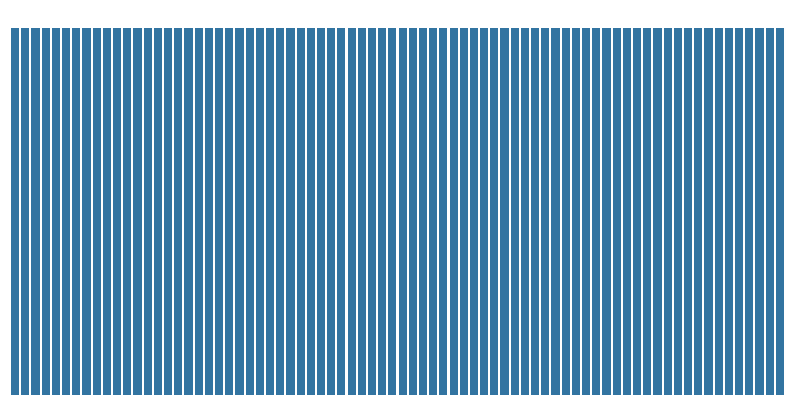

In [ ]:
plt.figure(figsize = (10, 5))
sb.countplot(tracks['year'])
plt.axis('off')
plt.show()


In [ ]:
floats = []
for col in tracks.columns:
  if tracks[col].dtype == 'float':
	  floats.append(col)

len(floats)


12

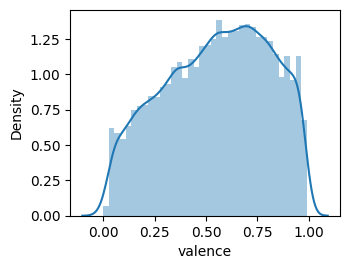

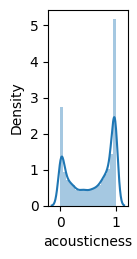

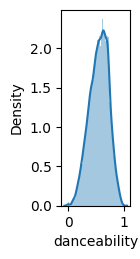

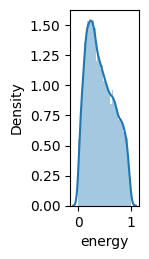

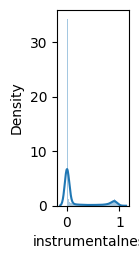

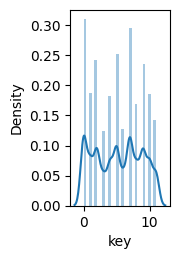

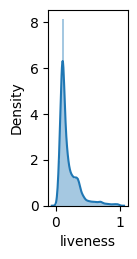

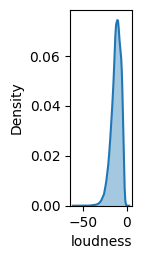

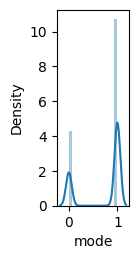

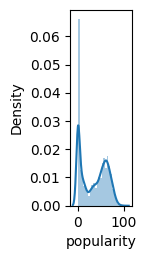

ValueError: num must be an integer with 1 <= num <= 10, not 11

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.subplots(figsize = (15, 5))
for i, col in enumerate(floats):
  plt.subplot(2, 5, i + 1)
  sb.distplot(tracks[col])
  plt.tight_layout()
  plt.show()


In [ ]:
%%capture
song_vectorizer = CountVectorizer()
song_vectorizer.fit(tracks['genres'])


In [ ]:
tracks = tracks.sort_values(by=['popularity'], ascending=False).head(10000)


In [ ]:
def get_similarities(song_name, data):

# Getting vector for the input song.
  text_array1 = song_vectorizer.transform(data[data['name']==song_name]['genres']).toarray()
  num_array1 = data[data['name']==song_name].select_dtypes(include=np.number).to_numpy()

# We will store similarity for each row of the dataset.
  sim = []
  for idx, row in data.iterrows():
	   name = row['name']
	# Getting vector for current song.
	   text_array2 = song_vectorizer.transform(data[data['name']==name]['genres']).toarray()
	   num_array2 = data[data['name']==name].select_dtypes(include=np.number).to_numpy()
	# Calculating similarities for text as well as numeric features
	   text_sim = cosine_similarity(text_array1, text_array2)[0][0]
	   num_sim = cosine_similarity(num_array1, num_array2)[0][0]
	   sim.append(text_sim + num_sim)

  return sim


In [ ]:
def recommend_songs(song_name, data=tracks):
# Base case
  if tracks[tracks['name'] == song_name].shape[0] == 0:
	  print('This song is either not so popular or you\
	  have entered invalid_name.\n Some songs you may like:\n')

	  for song in data.sample(n=5)['name'].values:
	   print(song)
	   return

  data['similarity_factor'] = get_similarities(song_name, data)

  data.sort_values(by=['similarity_factor', 'popularity'],
				ascending = [False, False],
				inplace=True)

# First song will be the input song itself as the similarity will be highest.
  display(data[['name', 'artists']][2:7])


In [ ]:
recommend_songs('Shape of You')


,name,artists
14582,Now And Forever,['Richard Marx']
19598,Astronaut In The Ocean,['Masked Wolf']
11529,Goodbye Cruel World,['Pink Floyd']
9778,I'll See You in My Dreams,['Django Reinhardt']
13017,Smooth Criminal - 2012 Remaster,['Michael Jackson']


In [ ]:
recommend_songs('Love Someone')


This song is either not so popular or you	  have entered invalid_name.
 Some songs you may like:

Mi Media Mitad


In [ ]:
recommend_songs('Love me like you do')


This song is either not so popular or you	  have entered invalid_name.
 Some songs you may like:

Build God, Then We'll Talk


In [ ]:
recommend_songs('When We Die')

This song is either not so popular or you	  have entered invalid_name.
 Some songs you may like:

The Spirit Of Radio
